### In this notebook we are going to implement the exercises as part of the lecture on Classification.

In [1]:
# Import libraries
import numpy as np 
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml

from collections import Counter # Useful for calculating the number of instances (see BONUS material)

import matplotlib.pyplot as plt

## Exercises

### Exploratory Analysis

1. Import the Iris dataset
2. Visualise your data using scatter graphs

In [2]:
# Import iris dataset
iris = datasets.load_iris()

In [3]:
# Get iris features and labels
X = iris.data
y = iris.target

In [4]:
# Find out how many different features there are (150 rows and 4 features)
print(X.shape)

(150, 4)


Find column names of Iris dataset here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [5]:
# Convert X to pandas dataframe
column_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris_df = pd.DataFrame(X, columns=column_names)

Text(0.5, 1.0, 'Graph of Sepal Width against Sepal Length')

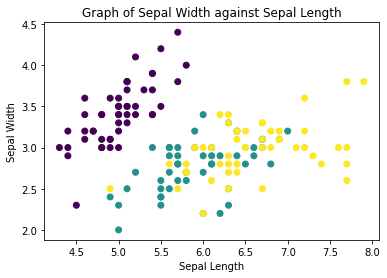

In [6]:
# Visualise data, colour scatterpoints using labels
plt.scatter(x=iris_df['Sepal Length'], y=iris_df['Sepal Width'],
           c=y)

# Set labels for x axis, y axis and plot title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Graph of Sepal Width against Sepal Length')

### Data Split

3. Split the dataset into training and testing sets. Choose the ratio: should we have more than 2 sets of data?

In [7]:
# Split data into train and test sets with 20% for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

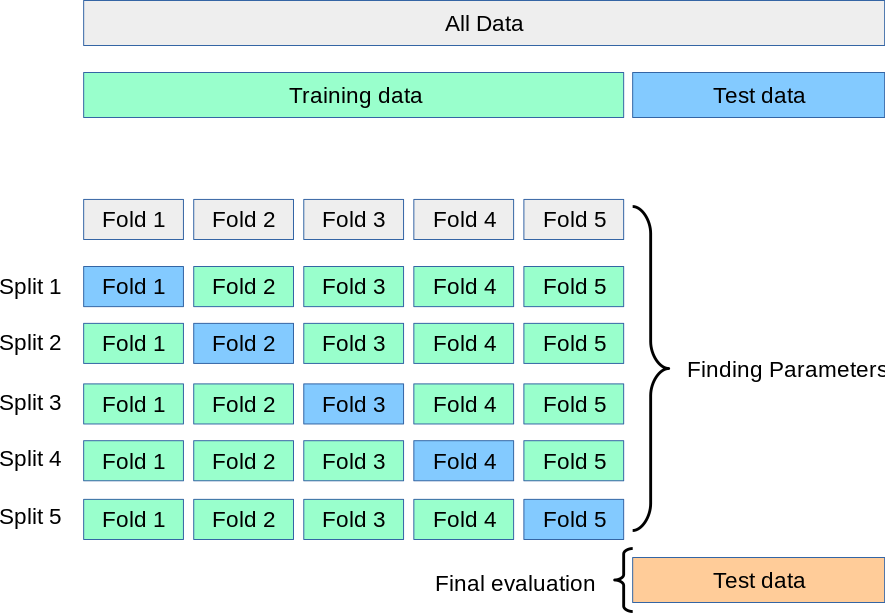

In [8]:
# Get multiple splits using K fold cross validation
kf = KFold(n_splits=2)
kf.get_n_splits(X_train)

print(kf)

# Split data into two folds
for train_index, val_index in kf.split(X_train):
    X_fold, X_val = X_train[train_index], X_train[val_index]
    y_fold, y_val = y_train[train_index], y_train[val_index]

KFold(n_splits=2, random_state=None, shuffle=False)


# K-Nearest Neighbours

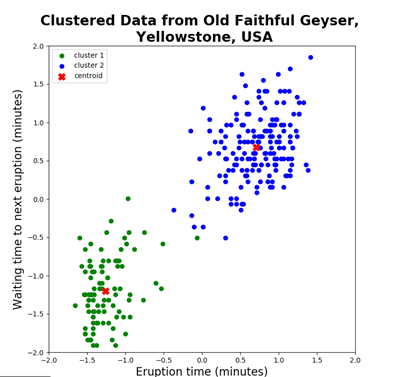

### Model Training

4. Implement a k-nearest neighbours classifier on the training set

5. Experiment with the value of k and assess the performance. Does this make sense compared to what you expect?

/home/lina3611/anaconda3/envs/kaip/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


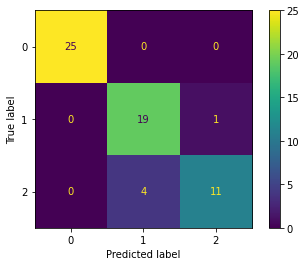

/home/lina3611/anaconda3/envs/kaip/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


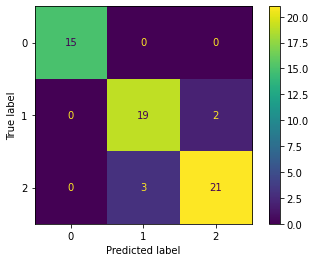

In [9]:
# Implement k-nearest neighbours classifier
k = 2 # Number of nearest neighbours, change this value to assess difference in performance

KNC = KNeighborsClassifier(n_neighbors=k)

# Split data into two folds
for train_index, val_index in kf.split(X_train):
    
    X_fold, X_val = X_train[train_index], X_train[val_index]
    y_fold, y_val = y_train[train_index], y_train[val_index]
    
    # Fit training data
    KNC.fit(X_fold, y_fold)

    # Display confusion matrix of K-nearest neighbours classifier
    plot_confusion_matrix(KNC, X_val, y_val)  
    plt.show()

In [ ]:
# Get multiple splits using K fold cross validation
kf = KFold(n_splits=3)
kf.get_n_splits(X_train)

k = 3
KNC = KNeighborsClassifier(n_neighbors=k)

# Split data into k folds
for train_index, val_index in kf.split(X_train):
    X_fold, X_val = X_train[train_index], X_train[val_index]
    y_fold, y_val = y_train[train_index], y_train[val_index]
    
    # Fit training data
    KNC.fit(X_fold, y_fold)

    # Display confusion matrix of K-nearest neighbours classifier
    plot_confusion_matrix(KNC, X_test, y_test)  
    plt.show()

# Decision Tree

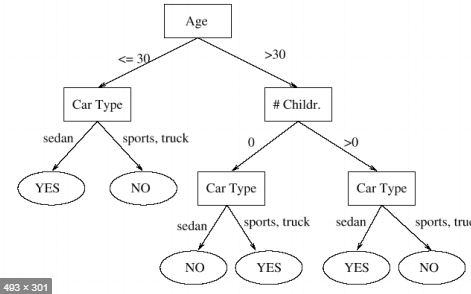

Repeat the classification but this time with a ‘Decision Tree’ and display the decision tree that has been generated. 

Visualise your features using a scatter graph and check that the rules the decision tree has learned are correct


In [ ]:
# Fit decision tree to training set
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# Visualise decision tree
plt.figure(figsize=(12,12)) # Set plot figure to make the decision plot larger
tree.plot_tree(clf, fontsize=10)
plt.show()

In [ ]:
# Visualise data, colour scatterpoints using labels
# Sanity check the first split of the decision tree where X[2] corresponds to the petal length (x axis)
plt.scatter(x=iris_df['Petal Length'], y=iris_df['Petal Width'], c=y)
plt.vlines(x=2.45, ymin=0, ymax=2.5, colors='r')
plt.vlines(x=4.75, ymin=0, ymax=2.5, colors='b')

# Set labels for x axis, y axis and plot title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Graph of Petal Width against Petal Length')

Experiment with  different tree depths to see how this affects the performance of the classification.

In [ ]:
# Change depth of tree
max_depth_int = 1

# Fit decision tree to training set
clf = tree.DecisionTreeClassifier(max_depth=max_depth_int)
clf = clf.fit(X_train, y_train)

# Display confusion matrix of K-nearest neighbours classifier
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

# Support Vector Machine

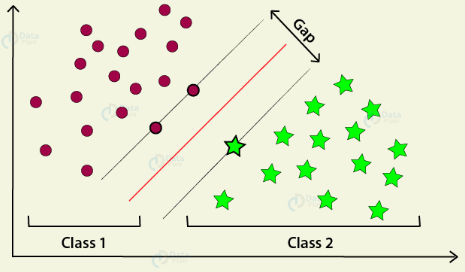

Now repeat the experiment with the Support Vector Machine (SVM).

Assess the performance and check once again how this changes with variation of the regularisation parameter, C. How do you think regularisation works in this case?

In [ ]:
# Use SVM model
C = 0.5
svm_model = SVC(kernel='sigmoid', coef0=C)
svm_model.fit(X_train, y_train)

# Display confusion matrix of SVM classifier
plot_confusion_matrix(svm_model, X_test, y_test)  
plt.show()

In [ ]:
# Try different variations of the regularisation parameter.
for C in [-5, -1, 0, 1, 5]:
    svm_model = SVC(kernel='sigmoid', coef0=C)
    svm_model.fit(X_train, y_train)

    # Display confusion matrix of SVM classifier
    plot_confusion_matrix(svm_model, X_test, y_test)  
    plt.show()

Experiment with different kernels for the SVM.

In [ ]:
C = 1.0

# Change kernel
kernel_type = 'linear' # other options such as: rbf, poly
svm_model = SVC(kernel=kernel_type, coef0=C)
svm_model.fit(X_train, y_train)

# Display confusion matrix of SVM classifier
plot_confusion_matrix(svm_model, X_test, y_test)  
plt.show()